# 19장 세상에 없는 얼굴 GAN, 오토인코더

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch19-colab.ipynb)

## 3. 적대적 신경망 실행하기

### 실습: GAN 모델 만들기

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import matplotlib.pyplot as plt

# 예제 파일에서 data 폴더 아래에 이미지가 저장될 gan_images 폴더가 함께 제공됩니다.
# 만약 이미지가 저장될 폴더가 없다면 아래 코드의 주석을 해제해 gan_images 폴더를 만듭니다.
# import os
# if not os.path.exists("./data/gan_images"):
#    os.makedirs("./data/gan_images")

# 생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

# 판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False 
# 판별자의 변경된 가중치는 생성자의 가중치를 업데이트하는데 활용
# 판별자 자신이 학습되지는 않음

# 생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 28, 28, 1)         865281    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


1/1 [==============================] - 0s 141ms/step
epoch:0  d_loss:0.6957  g_loss:0.5560
1/1 [==============================] - 0s 16ms/step
epoch:1  d_loss:0.5615  g_loss:0.3292
1/1 [==============================] - 0s 31ms/step
epoch:2  d_loss:0.5847  g_loss:0.2383
1/1 [==============================] - 0s 24ms/step
epoch:3  d_loss:0.5325  g_loss:0.3162
1/1 [==============================] - 0s 16ms/step
epoch:4  d_loss:0.4641  g_loss:0.4902
1/1 [==============================] - 0s 28ms/step
epoch:5  d_loss:0.4101  g_loss:0.7262
1/1 [==============================] - 0s 25ms/step
epoch:6  d_loss:0.3959  g_loss:0.8822
1/1 [==============================] - 0s 24ms/step
epoch:7  d_loss:0.4586  g_loss:0.6918
1/1 [==============================] - 0s 23ms/step
epoch:8  d_loss:0.4525  g_loss:0.5261
1/1 [==============================] - 0s 27ms/step
epoch:9  d_loss:0.5642  g_loss:0.2965
1/1 [==============================] - 0s 17ms/step
epoch:10  d_loss:0.4981  g_loss:0.3008
1/1 [===

epoch:89  d_loss:0.5113  g_loss:1.7717
1/1 [==============================] - 0s 24ms/step
epoch:90  d_loss:0.6492  g_loss:1.4418
1/1 [==============================] - 0s 23ms/step
epoch:91  d_loss:0.4415  g_loss:1.5788
1/1 [==============================] - 0s 24ms/step
epoch:92  d_loss:0.5339  g_loss:1.6658
1/1 [==============================] - 0s 26ms/step
epoch:93  d_loss:0.4570  g_loss:2.0271
1/1 [==============================] - 0s 25ms/step
epoch:94  d_loss:0.5024  g_loss:2.0271
1/1 [==============================] - 0s 24ms/step
epoch:95  d_loss:0.4059  g_loss:2.3747
1/1 [==============================] - 0s 25ms/step
epoch:96  d_loss:0.4447  g_loss:1.9674
1/1 [==============================] - 0s 24ms/step
epoch:97  d_loss:0.3966  g_loss:1.7372
1/1 [==============================] - 0s 24ms/step
epoch:98  d_loss:0.4464  g_loss:1.9894
1/1 [==============================] - 0s 24ms/step
epoch:99  d_loss:0.3253  g_loss:1.8513
1/1 [==============================] - 0s 24ms/step

1/1 [==============================] - 0s 25ms/step
epoch:179  d_loss:0.3858  g_loss:1.9190
1/1 [==============================] - 0s 24ms/step
epoch:180  d_loss:0.5068  g_loss:1.7072
1/1 [==============================] - 0s 24ms/step
epoch:181  d_loss:0.3109  g_loss:2.4691
1/1 [==============================] - 0s 24ms/step
epoch:182  d_loss:0.3461  g_loss:2.5506
1/1 [==============================] - 0s 23ms/step
epoch:183  d_loss:0.3194  g_loss:2.1479
1/1 [==============================] - 0s 24ms/step
epoch:184  d_loss:0.2894  g_loss:2.6241
1/1 [==============================] - 0s 25ms/step
epoch:185  d_loss:0.3117  g_loss:2.5086
1/1 [==============================] - 0s 20ms/step
epoch:186  d_loss:0.3449  g_loss:2.3664
1/1 [==============================] - 0s 23ms/step
epoch:187  d_loss:0.4578  g_loss:2.0303
1/1 [==============================] - 0s 24ms/step
epoch:188  d_loss:0.3940  g_loss:2.1311
1/1 [==============================] - 0s 24ms/step
epoch:189  d_loss:0.2826  g_

1/1 [==============================] - 0s 23ms/step
epoch:267  d_loss:0.2813  g_loss:2.8126
1/1 [==============================] - 0s 25ms/step
epoch:268  d_loss:0.2259  g_loss:3.1836
1/1 [==============================] - 0s 26ms/step
epoch:269  d_loss:0.3383  g_loss:2.8864
1/1 [==============================] - 0s 24ms/step
epoch:270  d_loss:0.3310  g_loss:2.4910
1/1 [==============================] - 0s 24ms/step
epoch:271  d_loss:0.4894  g_loss:2.6643
1/1 [==============================] - 0s 24ms/step
epoch:272  d_loss:0.3017  g_loss:2.7293
1/1 [==============================] - 0s 13ms/step
epoch:273  d_loss:0.2731  g_loss:2.9426
1/1 [==============================] - 0s 24ms/step
epoch:274  d_loss:0.2823  g_loss:3.1008
1/1 [==============================] - 0s 23ms/step
epoch:275  d_loss:0.2346  g_loss:3.4463
1/1 [==============================] - 0s 24ms/step
epoch:276  d_loss:0.2680  g_loss:4.1796
1/1 [==============================] - 0s 24ms/step
epoch:277  d_loss:0.2040  g_

1/1 [==============================] - 0s 23ms/step
epoch:356  d_loss:0.4113  g_loss:2.1149
1/1 [==============================] - 0s 24ms/step
epoch:357  d_loss:0.3367  g_loss:2.7250
1/1 [==============================] - 0s 24ms/step
epoch:358  d_loss:0.3786  g_loss:2.8474
1/1 [==============================] - 0s 23ms/step
epoch:359  d_loss:0.3419  g_loss:3.0723
1/1 [==============================] - 0s 22ms/step
epoch:360  d_loss:0.2217  g_loss:3.4586
1/1 [==============================] - 0s 25ms/step
epoch:361  d_loss:0.2987  g_loss:3.0816
1/1 [==============================] - 0s 23ms/step
epoch:362  d_loss:0.2701  g_loss:2.6521
1/1 [==============================] - 0s 25ms/step
epoch:363  d_loss:0.5403  g_loss:2.2633
1/1 [==============================] - 0s 42ms/step
epoch:364  d_loss:0.4143  g_loss:2.6856
1/1 [==============================] - 0s 26ms/step
epoch:365  d_loss:0.3823  g_loss:2.3216
1/1 [==============================] - 0s 24ms/step
epoch:366  d_loss:0.2343  g_

1/1 [==============================] - 0s 26ms/step
epoch:444  d_loss:0.2272  g_loss:3.6205
1/1 [==============================] - 0s 16ms/step
epoch:445  d_loss:0.2223  g_loss:3.3250
1/1 [==============================] - 0s 25ms/step
epoch:446  d_loss:0.3024  g_loss:3.2842
1/1 [==============================] - 0s 25ms/step
epoch:447  d_loss:0.2552  g_loss:3.0161
1/1 [==============================] - 0s 10ms/step
epoch:448  d_loss:0.2542  g_loss:2.3699
1/1 [==============================] - 0s 25ms/step
epoch:449  d_loss:0.1314  g_loss:3.0172
1/1 [==============================] - 0s 27ms/step
epoch:450  d_loss:0.1383  g_loss:3.1257
1/1 [==============================] - 0s 25ms/step
epoch:451  d_loss:0.2542  g_loss:3.1735
1/1 [==============================] - 0s 24ms/step
epoch:452  d_loss:0.1177  g_loss:3.5871
1/1 [==============================] - 0s 25ms/step
epoch:453  d_loss:0.3482  g_loss:2.3886
1/1 [==============================] - 0s 25ms/step
epoch:454  d_loss:0.2666  g_

1/1 [==============================] - 0s 24ms/step
epoch:533  d_loss:0.1948  g_loss:3.0537
1/1 [==============================] - 0s 27ms/step
epoch:534  d_loss:0.2268  g_loss:3.0891
1/1 [==============================] - 0s 23ms/step
epoch:535  d_loss:0.2076  g_loss:2.2379
1/1 [==============================] - 0s 23ms/step
epoch:536  d_loss:0.2445  g_loss:2.9502
1/1 [==============================] - 0s 24ms/step
epoch:537  d_loss:0.2645  g_loss:2.9183
1/1 [==============================] - 0s 23ms/step
epoch:538  d_loss:0.1659  g_loss:3.6144
1/1 [==============================] - 0s 24ms/step
epoch:539  d_loss:0.2936  g_loss:2.7910
1/1 [==============================] - 0s 24ms/step
epoch:540  d_loss:0.2560  g_loss:2.5967
1/1 [==============================] - 0s 24ms/step
epoch:541  d_loss:0.2915  g_loss:2.7387
1/1 [==============================] - 0s 24ms/step
epoch:542  d_loss:0.3010  g_loss:2.8902
1/1 [==============================] - 0s 25ms/step
epoch:543  d_loss:0.2802  g_

1/1 [==============================] - 0s 27ms/step
epoch:621  d_loss:0.1285  g_loss:4.0416
1/1 [==============================] - 0s 25ms/step
epoch:622  d_loss:0.1833  g_loss:3.6917
1/1 [==============================] - 0s 31ms/step
epoch:623  d_loss:0.1891  g_loss:2.8853
1/1 [==============================] - 0s 19ms/step
epoch:624  d_loss:0.1665  g_loss:3.3733
1/1 [==============================] - 0s 26ms/step
epoch:625  d_loss:0.1779  g_loss:3.0427
1/1 [==============================] - 0s 21ms/step
epoch:626  d_loss:0.1851  g_loss:3.7351
1/1 [==============================] - 0s 25ms/step
epoch:627  d_loss:0.1111  g_loss:4.0802
1/1 [==============================] - 0s 23ms/step
epoch:628  d_loss:0.3828  g_loss:2.5419
1/1 [==============================] - 0s 26ms/step
epoch:629  d_loss:0.2914  g_loss:2.3183
1/1 [==============================] - 0s 24ms/step
epoch:630  d_loss:0.2218  g_loss:2.3140
1/1 [==============================] - 0s 24ms/step
epoch:631  d_loss:0.3305  g_

1/1 [==============================] - 0s 11ms/step
epoch:710  d_loss:0.3053  g_loss:4.8209
1/1 [==============================] - 0s 24ms/step
epoch:711  d_loss:0.2659  g_loss:5.4450
1/1 [==============================] - 0s 24ms/step
epoch:712  d_loss:0.2595  g_loss:4.3031
1/1 [==============================] - 0s 21ms/step
epoch:713  d_loss:0.1064  g_loss:3.8477
1/1 [==============================] - 0s 24ms/step
epoch:714  d_loss:0.1810  g_loss:3.4569
1/1 [==============================] - 0s 24ms/step
epoch:715  d_loss:0.2862  g_loss:3.8095
1/1 [==============================] - 0s 24ms/step
epoch:716  d_loss:0.5407  g_loss:2.7689
1/1 [==============================] - 0s 26ms/step
epoch:717  d_loss:0.4288  g_loss:2.8119
1/1 [==============================] - 0s 24ms/step
epoch:718  d_loss:0.3466  g_loss:3.2190
1/1 [==============================] - 0s 16ms/step
epoch:719  d_loss:0.6315  g_loss:3.1405
1/1 [==============================] - 0s 26ms/step
epoch:720  d_loss:0.4757  g_

1/1 [==============================] - 0s 23ms/step
epoch:799  d_loss:0.1823  g_loss:2.9545
1/1 [==============================] - 0s 23ms/step
epoch:800  d_loss:0.2382  g_loss:2.8255
1/1 [==============================] - 0s 31ms/step
epoch:801  d_loss:0.3773  g_loss:2.4312
1/1 [==============================] - 0s 16ms/step
epoch:802  d_loss:0.3492  g_loss:2.6969
1/1 [==============================] - 0s 24ms/step
epoch:803  d_loss:0.3589  g_loss:2.0932
1/1 [==============================] - 0s 26ms/step
epoch:804  d_loss:0.3598  g_loss:2.0079
1/1 [==============================] - 0s 24ms/step
epoch:805  d_loss:0.3255  g_loss:1.8191
1/1 [==============================] - 0s 23ms/step
epoch:806  d_loss:0.3572  g_loss:1.8031
1/1 [==============================] - 0s 23ms/step
epoch:807  d_loss:0.4896  g_loss:1.7793
1/1 [==============================] - 0s 23ms/step
epoch:808  d_loss:0.4709  g_loss:1.6687
1/1 [==============================] - 0s 23ms/step
epoch:809  d_loss:0.5461  g_

1/1 [==============================] - 0s 25ms/step
epoch:887  d_loss:0.4041  g_loss:2.1437
1/1 [==============================] - 0s 24ms/step
epoch:888  d_loss:0.4268  g_loss:2.4274
1/1 [==============================] - 0s 25ms/step
epoch:889  d_loss:0.3482  g_loss:2.3873
1/1 [==============================] - 0s 28ms/step
epoch:890  d_loss:0.2683  g_loss:2.3418
1/1 [==============================] - 0s 31ms/step
epoch:891  d_loss:0.3322  g_loss:2.0842
1/1 [==============================] - 0s 24ms/step
epoch:892  d_loss:0.4269  g_loss:1.8780
1/1 [==============================] - 0s 24ms/step
epoch:893  d_loss:0.3746  g_loss:1.7193
1/1 [==============================] - 0s 25ms/step
epoch:894  d_loss:0.4426  g_loss:1.8647
1/1 [==============================] - 0s 24ms/step
epoch:895  d_loss:0.3788  g_loss:2.6427
1/1 [==============================] - 0s 25ms/step
epoch:896  d_loss:0.3981  g_loss:2.2587
1/1 [==============================] - 0s 22ms/step
epoch:897  d_loss:0.2707  g_

1/1 [==============================] - 0s 16ms/step
epoch:976  d_loss:0.3736  g_loss:1.8780
1/1 [==============================] - 0s 26ms/step
epoch:977  d_loss:0.4819  g_loss:1.6551
1/1 [==============================] - 0s 25ms/step
epoch:978  d_loss:0.5071  g_loss:1.5631
1/1 [==============================] - 0s 24ms/step
epoch:979  d_loss:0.3986  g_loss:1.8606
1/1 [==============================] - 0s 24ms/step
epoch:980  d_loss:0.3202  g_loss:2.2484
1/1 [==============================] - 0s 26ms/step
epoch:981  d_loss:0.3888  g_loss:2.5849
1/1 [==============================] - 0s 27ms/step
epoch:982  d_loss:0.3505  g_loss:3.3578
1/1 [==============================] - 0s 11ms/step
epoch:983  d_loss:0.4181  g_loss:2.2981
1/1 [==============================] - 0s 26ms/step
epoch:984  d_loss:0.4290  g_loss:2.3662
1/1 [==============================] - 0s 25ms/step
epoch:985  d_loss:0.3792  g_loss:1.8182
1/1 [==============================] - 0s 26ms/step
epoch:986  d_loss:0.3890  g_

1/1 [==============================] - 0s 24ms/step
epoch:1064  d_loss:0.3249  g_loss:1.9150
1/1 [==============================] - 0s 25ms/step
epoch:1065  d_loss:0.3959  g_loss:1.6386
1/1 [==============================] - 0s 25ms/step
epoch:1066  d_loss:0.2951  g_loss:2.2321
1/1 [==============================] - 0s 24ms/step
epoch:1067  d_loss:0.3488  g_loss:2.4775
1/1 [==============================] - 0s 27ms/step
epoch:1068  d_loss:0.3389  g_loss:2.3914
1/1 [==============================] - 0s 24ms/step
epoch:1069  d_loss:0.4078  g_loss:2.4795
1/1 [==============================] - 0s 31ms/step
epoch:1070  d_loss:0.4789  g_loss:1.5628
1/1 [==============================] - 0s 26ms/step
epoch:1071  d_loss:0.3472  g_loss:1.9738
1/1 [==============================] - 0s 25ms/step
epoch:1072  d_loss:0.2517  g_loss:2.4506
1/1 [==============================] - 0s 28ms/step
epoch:1073  d_loss:0.4608  g_loss:2.3645
1/1 [==============================] - 0s 25ms/step
epoch:1074  d_loss

1/1 [==============================] - 0s 24ms/step
epoch:1152  d_loss:0.3034  g_loss:2.3390
1/1 [==============================] - 0s 24ms/step
epoch:1153  d_loss:0.3959  g_loss:2.5318
1/1 [==============================] - 0s 11ms/step
epoch:1154  d_loss:0.3921  g_loss:2.2295
1/1 [==============================] - 0s 24ms/step
epoch:1155  d_loss:0.4522  g_loss:1.9882
1/1 [==============================] - 0s 25ms/step
epoch:1156  d_loss:0.4155  g_loss:1.7107
1/1 [==============================] - 0s 25ms/step
epoch:1157  d_loss:0.3045  g_loss:2.0524
1/1 [==============================] - 0s 25ms/step
epoch:1158  d_loss:0.4523  g_loss:1.9918
1/1 [==============================] - 0s 25ms/step
epoch:1159  d_loss:0.4493  g_loss:2.2015
1/1 [==============================] - 0s 24ms/step
epoch:1160  d_loss:0.3136  g_loss:2.5536
1/1 [==============================] - 0s 19ms/step
epoch:1161  d_loss:0.5379  g_loss:1.9799
1/1 [==============================] - 0s 25ms/step
epoch:1162  d_loss

epoch:1239  d_loss:0.3469  g_loss:3.1946
1/1 [==============================] - 0s 28ms/step
epoch:1240  d_loss:0.5957  g_loss:2.1105
1/1 [==============================] - 0s 21ms/step
epoch:1241  d_loss:0.6108  g_loss:1.3975
1/1 [==============================] - 0s 31ms/step
epoch:1242  d_loss:0.5284  g_loss:1.6415
1/1 [==============================] - 0s 27ms/step
epoch:1243  d_loss:0.5457  g_loss:1.6044
1/1 [==============================] - 0s 26ms/step
epoch:1244  d_loss:0.3109  g_loss:2.3959
1/1 [==============================] - 0s 25ms/step
epoch:1245  d_loss:0.5873  g_loss:1.7775
1/1 [==============================] - 0s 25ms/step
epoch:1246  d_loss:0.4006  g_loss:2.3979
1/1 [==============================] - 0s 25ms/step
epoch:1247  d_loss:0.5565  g_loss:2.0321
1/1 [==============================] - 0s 25ms/step
epoch:1248  d_loss:0.4098  g_loss:1.4095
1/1 [==============================] - 0s 25ms/step
epoch:1249  d_loss:0.4175  g_loss:1.7587
1/1 [========================

1/1 [==============================] - 0s 24ms/step
epoch:1328  d_loss:0.5100  g_loss:1.3931
1/1 [==============================] - 0s 25ms/step
epoch:1329  d_loss:0.6283  g_loss:1.3946
1/1 [==============================] - 0s 25ms/step
epoch:1330  d_loss:0.5862  g_loss:1.5195
1/1 [==============================] - 0s 26ms/step
epoch:1331  d_loss:0.5839  g_loss:1.7768
1/1 [==============================] - 0s 26ms/step
epoch:1332  d_loss:0.3535  g_loss:1.8735
1/1 [==============================] - 0s 31ms/step
epoch:1333  d_loss:0.5032  g_loss:2.5925
1/1 [==============================] - 0s 26ms/step
epoch:1334  d_loss:0.4773  g_loss:1.9478
1/1 [==============================] - 0s 31ms/step
epoch:1335  d_loss:0.4486  g_loss:1.6985
1/1 [==============================] - 0s 27ms/step
epoch:1336  d_loss:0.3459  g_loss:1.2929
1/1 [==============================] - 0s 17ms/step
epoch:1337  d_loss:0.6245  g_loss:1.2117
1/1 [==============================] - 0s 24ms/step
epoch:1338  d_loss

epoch:1415  d_loss:0.4235  g_loss:1.9826
1/1 [==============================] - 0s 27ms/step
epoch:1416  d_loss:0.5836  g_loss:1.9398
1/1 [==============================] - 0s 18ms/step
epoch:1417  d_loss:0.4394  g_loss:1.9163
1/1 [==============================] - 0s 23ms/step
epoch:1418  d_loss:0.5334  g_loss:2.0733
1/1 [==============================] - 0s 26ms/step
epoch:1419  d_loss:0.4122  g_loss:1.9006
1/1 [==============================] - 0s 28ms/step
epoch:1420  d_loss:0.3104  g_loss:2.2469
1/1 [==============================] - 0s 20ms/step
epoch:1421  d_loss:0.3588  g_loss:2.3099
1/1 [==============================] - 0s 14ms/step
epoch:1422  d_loss:0.4066  g_loss:1.9544
1/1 [==============================] - 0s 17ms/step
epoch:1423  d_loss:0.4601  g_loss:1.6723
1/1 [==============================] - 0s 21ms/step
epoch:1424  d_loss:0.4013  g_loss:1.8771
1/1 [==============================] - 0s 25ms/step
epoch:1425  d_loss:0.4411  g_loss:1.7541
1/1 [========================

1/1 [==============================] - 0s 16ms/step
epoch:1504  d_loss:0.4457  g_loss:1.8811
1/1 [==============================] - 0s 16ms/step
epoch:1505  d_loss:0.3290  g_loss:2.1475
1/1 [==============================] - 0s 22ms/step
epoch:1506  d_loss:0.4039  g_loss:2.0729
1/1 [==============================] - 0s 25ms/step
epoch:1507  d_loss:0.4599  g_loss:2.1957
1/1 [==============================] - 0s 15ms/step
epoch:1508  d_loss:0.4265  g_loss:1.5880
1/1 [==============================] - 0s 19ms/step
epoch:1509  d_loss:0.5146  g_loss:1.7831
1/1 [==============================] - 0s 19ms/step
epoch:1510  d_loss:0.3458  g_loss:1.8178
1/1 [==============================] - 0s 22ms/step
epoch:1511  d_loss:0.3867  g_loss:1.7043
1/1 [==============================] - 0s 23ms/step
epoch:1512  d_loss:0.5382  g_loss:1.6176
1/1 [==============================] - 0s 26ms/step
epoch:1513  d_loss:0.3800  g_loss:1.9627
1/1 [==============================] - 0s 17ms/step
epoch:1514  d_loss

1/1 [==============================] - 0s 29ms/step
epoch:1592  d_loss:0.4321  g_loss:1.9848
1/1 [==============================] - 0s 15ms/step
epoch:1593  d_loss:0.3413  g_loss:2.1316
1/1 [==============================] - 0s 15ms/step
epoch:1594  d_loss:0.4873  g_loss:2.0452
1/1 [==============================] - 0s 14ms/step
epoch:1595  d_loss:0.4722  g_loss:1.9309
1/1 [==============================] - 0s 14ms/step
epoch:1596  d_loss:0.5439  g_loss:1.2479
1/1 [==============================] - 0s 27ms/step
epoch:1597  d_loss:0.5044  g_loss:1.5591
1/1 [==============================] - 0s 27ms/step
epoch:1598  d_loss:0.5406  g_loss:1.5214
1/1 [==============================] - 0s 31ms/step
epoch:1599  d_loss:0.4691  g_loss:1.5822
1/1 [==============================] - 0s 27ms/step
epoch:1600  d_loss:0.3459  g_loss:1.8634
1/1 [==============================] - 0s 31ms/step
epoch:1601  d_loss:0.5001  g_loss:1.9324
1/1 [==============================] - 0s 31ms/step
epoch:1602  d_loss

epoch:1679  d_loss:0.5378  g_loss:1.2976
1/1 [==============================] - 0s 26ms/step
epoch:1680  d_loss:0.4360  g_loss:1.4927
1/1 [==============================] - 0s 31ms/step
epoch:1681  d_loss:0.4042  g_loss:1.7745
1/1 [==============================] - 0s 26ms/step
epoch:1682  d_loss:0.4284  g_loss:2.1941
1/1 [==============================] - 0s 31ms/step
epoch:1683  d_loss:0.5245  g_loss:1.9617
1/1 [==============================] - 0s 29ms/step
epoch:1684  d_loss:0.5347  g_loss:1.6488
1/1 [==============================] - 0s 31ms/step
epoch:1685  d_loss:0.4436  g_loss:1.5108
1/1 [==============================] - 0s 33ms/step
epoch:1686  d_loss:0.4281  g_loss:1.3407
1/1 [==============================] - 0s 31ms/step
epoch:1687  d_loss:0.3889  g_loss:1.9296
1/1 [==============================] - 0s 20ms/step
epoch:1688  d_loss:0.3825  g_loss:1.3908
1/1 [==============================] - 0s 35ms/step
epoch:1689  d_loss:0.3371  g_loss:1.9937
1/1 [========================

1/1 [==============================] - 0s 31ms/step
epoch:1768  d_loss:0.4589  g_loss:2.0622
1/1 [==============================] - 0s 37ms/step
epoch:1769  d_loss:0.4697  g_loss:1.9987
1/1 [==============================] - 0s 16ms/step
epoch:1770  d_loss:0.4828  g_loss:1.7597
1/1 [==============================] - 0s 42ms/step
epoch:1771  d_loss:0.4572  g_loss:1.5713
1/1 [==============================] - 0s 28ms/step
epoch:1772  d_loss:0.4143  g_loss:1.8697
1/1 [==============================] - 0s 31ms/step
epoch:1773  d_loss:0.5331  g_loss:1.7880
1/1 [==============================] - 0s 27ms/step
epoch:1774  d_loss:0.4889  g_loss:1.8958
1/1 [==============================] - 0s 16ms/step
epoch:1775  d_loss:0.5393  g_loss:1.7794
1/1 [==============================] - 0s 42ms/step
epoch:1776  d_loss:0.4772  g_loss:1.5225
1/1 [==============================] - 0s 26ms/step
epoch:1777  d_loss:0.5488  g_loss:1.5937
1/1 [==============================] - 0s 31ms/step
epoch:1778  d_loss

epoch:1855  d_loss:0.5382  g_loss:1.7628
1/1 [==============================] - 0s 42ms/step
epoch:1856  d_loss:0.5333  g_loss:1.4295
1/1 [==============================] - 0s 31ms/step
epoch:1857  d_loss:0.6302  g_loss:1.5950
1/1 [==============================] - 0s 31ms/step
epoch:1858  d_loss:0.5966  g_loss:1.6756
1/1 [==============================] - 0s 33ms/step
epoch:1859  d_loss:0.5878  g_loss:1.4475
1/1 [==============================] - 0s 31ms/step
epoch:1860  d_loss:0.6415  g_loss:1.3778
1/1 [==============================] - 0s 47ms/step
epoch:1861  d_loss:0.5027  g_loss:1.5513
1/1 [==============================] - 0s 31ms/step
epoch:1862  d_loss:0.4446  g_loss:1.4045
1/1 [==============================] - 0s 31ms/step
epoch:1863  d_loss:0.5807  g_loss:1.4057
1/1 [==============================] - 0s 37ms/step
epoch:1864  d_loss:0.4876  g_loss:1.4665
1/1 [==============================] - 0s 31ms/step
epoch:1865  d_loss:0.5024  g_loss:1.3726
1/1 [========================

1/1 [==============================] - 0s 40ms/step
epoch:1944  d_loss:0.5422  g_loss:1.8165
1/1 [==============================] - 0s 31ms/step
epoch:1945  d_loss:0.5516  g_loss:1.6186
1/1 [==============================] - 0s 43ms/step
epoch:1946  d_loss:0.4188  g_loss:1.6108
1/1 [==============================] - 0s 34ms/step
epoch:1947  d_loss:0.4571  g_loss:1.5985
1/1 [==============================] - 0s 36ms/step
epoch:1948  d_loss:0.4578  g_loss:1.8032
1/1 [==============================] - 0s 31ms/step
epoch:1949  d_loss:0.4357  g_loss:1.2746
1/1 [==============================] - 0s 43ms/step
epoch:1950  d_loss:0.5170  g_loss:1.6023
1/1 [==============================] - 0s 31ms/step
epoch:1951  d_loss:0.4206  g_loss:1.8759
1/1 [==============================] - 0s 46ms/step
epoch:1952  d_loss:0.4195  g_loss:1.7660
1/1 [==============================] - 0s 40ms/step
epoch:1953  d_loss:0.6772  g_loss:1.7904
1/1 [==============================] - 0s 35ms/step
epoch:1954  d_loss

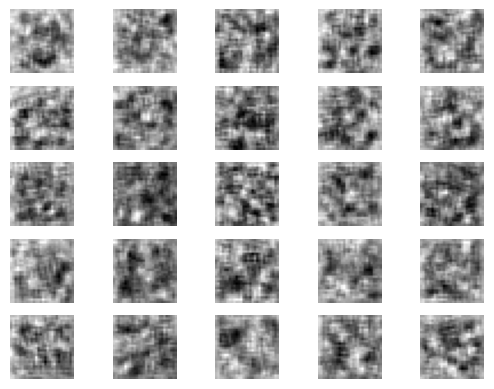

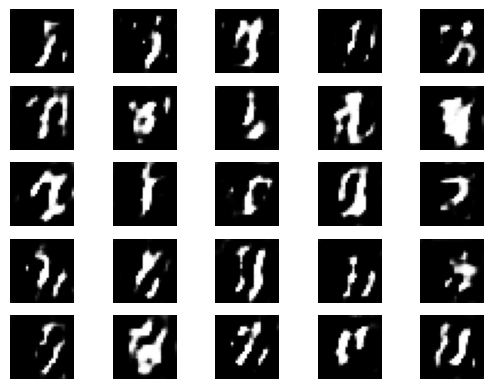

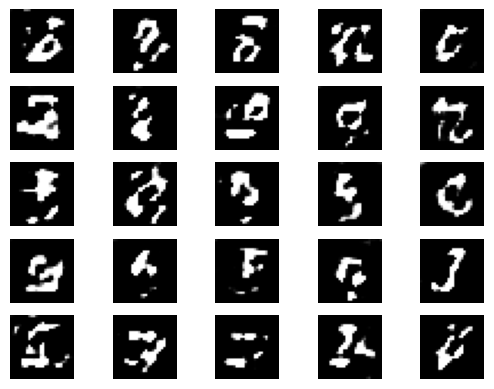

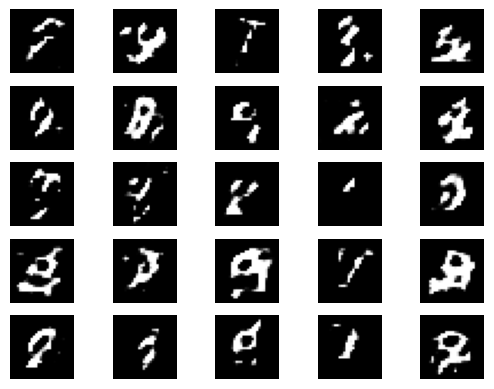

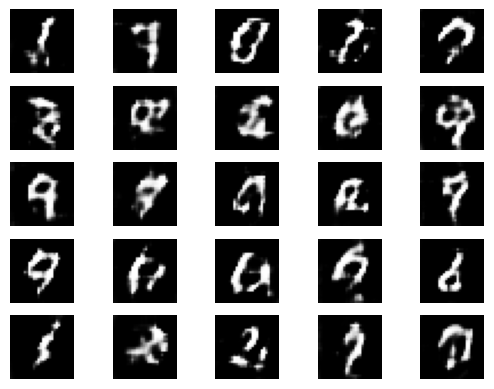

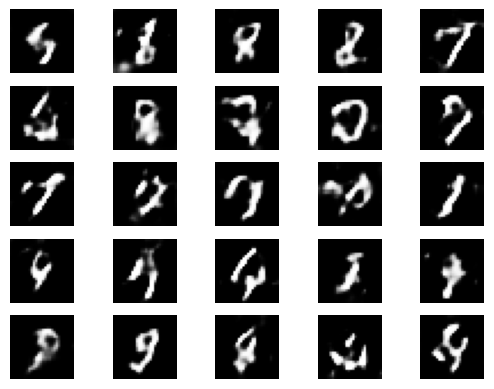

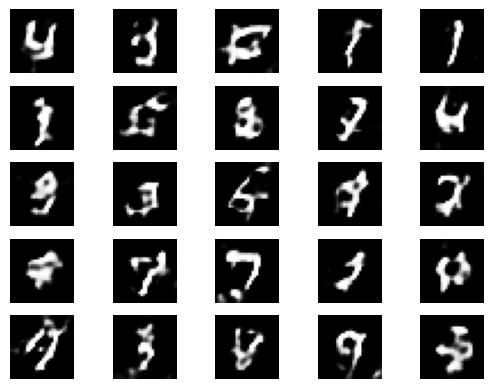

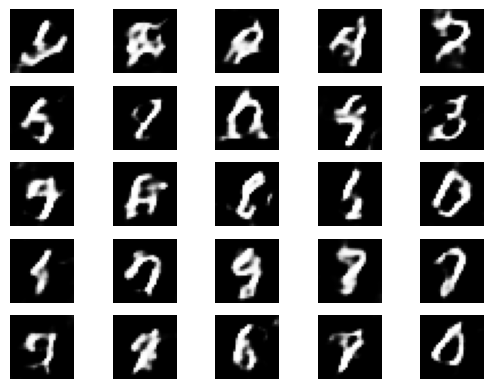

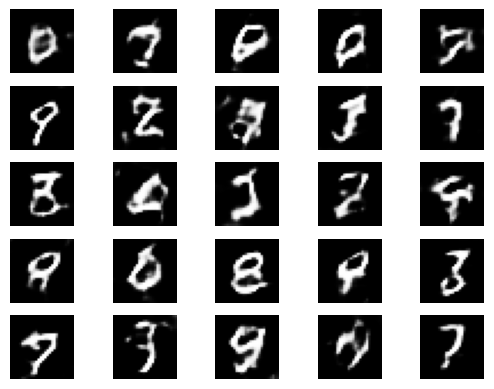

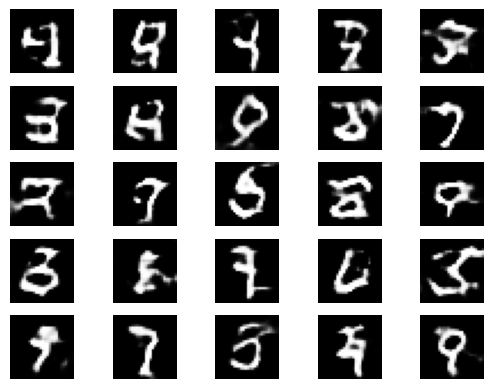

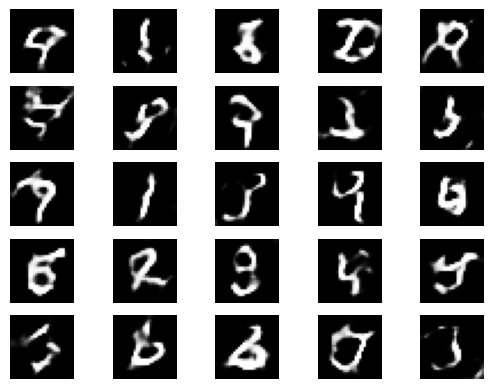

In [2]:
# 신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):

  # MNIST 데이터를 불러옵니다.

  (X_train, _), (_, _) = mnist.load_data()  # 앞서 불러온 적 있는 MNIST를 다시 이용합니다. 단, 테스트 과정은 필요 없고 이미지만 사용할 것이기 때문에 X_train만 불러왔습니다.
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  X_train = (X_train - 127.5) / 127.5  # 픽셀 값은 0에서 255 사이의 값입니다. 이전에 255로 나누어 줄때는 이를 0~1 사이의 값으로 바꾸었던 것인데, 여기서는 127.5를 빼준 뒤 127.5로 나누어 줌으로 인해 -1에서 1사이의 값으로 바뀌게 됩니다.
  # X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

  true = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for i in range(epoch):
          # 실제 데이터를 판별자에 입력하는 부분입니다.
          idx = np.random.randint(0, X_train.shape[0], batch_size)
          imgs = X_train[idx]
          d_loss_real = discriminator.train_on_batch(imgs, true)

          # 가상 이미지를 판별자에 입력하는 부분입니다.
          noise = np.random.normal(0, 1, (batch_size, 100))
          gen_imgs = generator.predict(noise)
          d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

          # 판별자와 생성자의 오차를 계산합니다.
          d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
          g_loss = gan.train_on_batch(noise, true)

          print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # 이 부분은 중간 과정을 이미지로 저장해 주는 부분입니다. 본 장의 주요 내용과 관련이 없어
        # 소스 코드만 첨부합니다. 만들어진 이미지들은 gan_images 폴더에 저장됩니다.
          if i % saving_interval == 0:
              #r, c = 5, 5
              noise = np.random.normal(0, 1, (25, 100))
              gen_imgs = generator.predict(noise)

              # Rescale images 0 - 1
              gen_imgs = 0.5 * gen_imgs + 0.5

              fig, axs = plt.subplots(5, 5)
              count = 0
              for j in range(5):
                  for k in range(5):
                      axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                      axs[j, k].axis('off')
                      count += 1
              fig.savefig("./data/gan_images/gan_mnist_%d.png" % i)

gan_train(2001, 32, 200)  # 2000번 반복되고, 배치 사이즈는 32,  200번마다 결과가 저장되게 하였습니다.

## 4. 이미지의 특징을 추출하는 오토인코더

### 실습: 오토인코더 실습하기

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터셋을 불러옵니다.

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 생성자 모델을 만듭니다.
autoencoder = Sequential()

# 인코딩 부분입니다.
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코딩 부분이 이어집니다. 
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

# 전체 구조를 확인해 봅니다.
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 8)          

Epoch 1/50
469/469 [==============================] - 24s 51ms/step - loss: 0.2088 - val_loss: 0.1382
Epoch 2/50
469/469 [==============================] - 24s 50ms/step - loss: 0.1252 - val_loss: 0.1153
Epoch 3/50
469/469 [==============================] - 25s 52ms/step - loss: 0.1120 - val_loss: 0.1073
Epoch 4/50
469/469 [==============================] - 25s 53ms/step - loss: 0.1061 - val_loss: 0.1028
Epoch 5/50
469/469 [==============================] - 25s 53ms/step - loss: 0.1026 - val_loss: 0.0999
Epoch 6/50
469/469 [==============================] - 25s 53ms/step - loss: 0.1000 - val_loss: 0.0977
Epoch 7/50
469/469 [==============================] - 25s 53ms/step - loss: 0.0980 - val_loss: 0.0960
Epoch 8/50
469/469 [==============================] - 25s 53ms/step - loss: 0.0964 - val_loss: 0.0945
Epoch 9/50
469/469 [==============================] - 25s 53ms/step - loss: 0.0950 - val_loss: 0.0931
Epoch 10/50
469/469 [==============================] - 25s 54ms/step - loss: 0.093

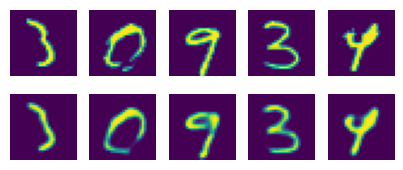

In [4]:
# 컴파일 및 학습을 하는 부분입니다.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# 학습된 결과를 출력하는 부분입니다.
random_test = np.random.randint(X_test.shape[0], size=5)  # 테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)                     # 앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))                         # 출력될 이미지의 크기를 정합니다.

for i, image_idx in enumerate(random_test):       # 랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))   # 테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28)) # 오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()